In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from dython.nominal import associations
from dython.nominal import identify_nominal_columns
from dython import nominal
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler





In [6]:
property_df = pd.read_csv('../data/curated/full_data.csv')

**Observe Basic Property Data Details**

In [7]:
property_df.shape

(10864, 20)

In [10]:
property_df.head(1)


,index,address,cost_text,Bed,Bath,Park,property_type,desc_head,LocID,longitude,latitude,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population,SA2_NAME21,duration_mins,Offence Count,SA2_CODE_2021
0,https://www.domain.com.au/warrandyte-vic-3113-...,Warrandyte VIC 3113,875.0,5,3,3,House,mud brick magic,211021262,145.209992,-37.747366,930.0,481.0,3051.0,2779.0,8781.0,Warrandyte - Wonga Park,>50.0,859.0,211021262.0


In [11]:
property_df.dtypes

index                           object
address                         object
cost_text                      float64
Bed                              int64
Bath                             int64
Park                             int64
property_type                   object
desc_head                       object
LocID                            int64
longitude                      float64
latitude                       float64
Median_tot_prsnl_inc_weekly    float64
Median_rent_weekly             float64
Median_tot_fam_inc_weekly      float64
Median_tot_hhd_inc_weekly      float64
total_population               float64
SA2_NAME21                      object
duration_mins                   object
Offence Count                  float64
SA2_CODE_2021                  float64
dtype: object

In [12]:
#list out categorical features
categorical_features = identify_nominal_columns(property_df)
categorical_features


['index',
 'address',
 'property_type',
 'desc_head',
 'SA2_NAME21',
 'duration_mins']

In [34]:
#rename columns
property_df.rename(columns={'cost_text':'Rent Price'}, inplace=True)
property_df.rename(columns={'Bed':'#Beds'}, inplace=True)
property_df.rename(columns={'Bath':'#Bathrooms'}, inplace=True)
property_df.rename(columns={'Park':'#Parking Spaces'}, inplace=True)
property_df.rename(columns={'property_type':'Property Type'}, inplace=True)
property_df.rename(columns={'Median_tot_prsnl_inc_weekly':'Median Total Personal Weekly Income'}, inplace=True)
property_df.rename(columns={'Median_rent_weekly':'Median Rent Weekly'}, inplace=True)
property_df.rename(columns={'Median_tot_fam_inc_weekly':'Median Total Family Weekly Income'}, inplace=True)
property_df.rename(columns={'desc_head':'Description Header'}, inplace=True)
property_df.rename(columns={'Median_tot_hhd_inc_weekly':'Median Total Household Weekly Income'}, inplace=True)
property_df.rename(columns={'total_population':'Total Population'}, inplace=True)
property_df.rename(columns={'SA2_NAME21':'Suburb Name'}, inplace=True)
property_df.rename(columns={'duration_mins':'Walking Time to nearest train station'}, inplace=True)
property_df.rename(columns={'Offence Count':'Total Offence Count'}, inplace=True)

In [37]:
property_df.columns

Index(['index', 'address', 'Rent Price', '# Beds', '# Bathrooms',
       '# Parking Spaces', 'Property Type', 'Description Header', 'LocID',
       'longitude', 'latitude', 'Median Total Personal Weekly Income',
       'Median Rent Weekly', 'Median Total Family Weekly Income',
       'Median Total Household Weekly Income', 'Total Population',
       'Suburb Name', 'Walking Time to nearest train station',
       'Total Offence Count', 'SA2_CODE_2021'],
      dtype='object')

In [38]:
#define columns of interest, removing those columns with unique values 

COL_FILTER = ['Rent Price', '# Beds', '# Bathrooms', '# Parking Spaces', 'Property Type',
              'Median Total Personal Weekly Income', 'Median Rent Weekly', 'Median Total Family Weekly Income', 'Description Header',
              'Median Total Household Weekly Income', 'Total Population', 'Suburb Name', 
              'Walking Time to nearest train station', 'Total Offence Count'] 

df_filtered = property_df[COL_FILTER]


**Generate correlation matrix with both categorical and continuous variables**

This uses Pearson’s R for continuous-continuous cases, Correlation Ratio for categorical-continuous cases, and
Cramer’s V or Theil’s U for categorical-categorical cases.
Code sourced from: https://medium.com/@knoldus/how-to-find-correlation-value-of-categorical-variables-23de7e7a9e26

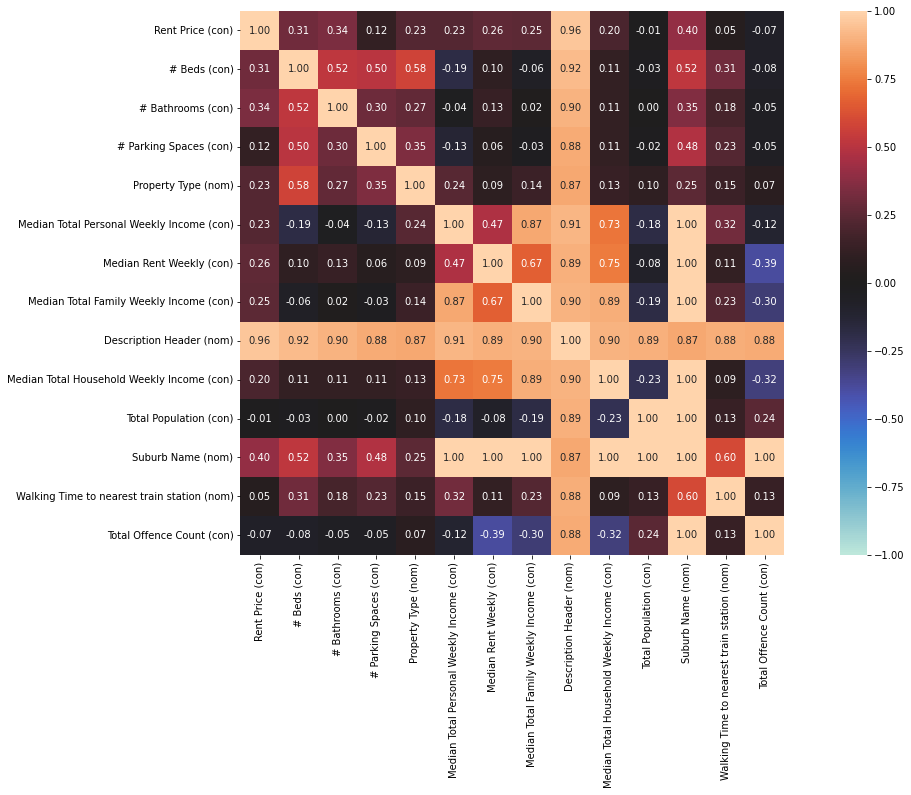

In [62]:
#define the associations function

nominal.associations(df_filtered,figsize=(20,10), mark_columns=True, cramers_v_bias_correction=False)

fig.savefig('../plots/correlation_matrix.png', bbox_inches="tight")

fig.show()


Interestingly, we see that Rent Price isn't strongly correlated with any of the features, which explains why the models have less than desired performance.

We also see that the Description Header is highly correlated with other variables, however we choose to keep this variable for future feature improvements given more time 

We also observe that Median Total Personal Weekly Income is highly correlated with Median Total Family Weekly Income and Median Total Household Weekly Income 

**Observe some of these correlations with scatterplots**

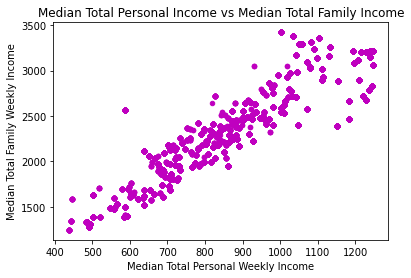

In [45]:
df_filtered[['Median Total Personal Weekly Income', 'Median Total Family Weekly Income']].plot.scatter(x='Median Total Personal Weekly Income', y='Median Total Family Weekly Income', c="m")
plt.title("Median Total Personal Weekly Income vs Median Total Family Weekly Income") 

plt.title("Median Total Personal Income vs Median Total Family Income")

plt.savefig('../plots/correlation_scatterplot_1.png', bbox_inches='tight')

plt.show()



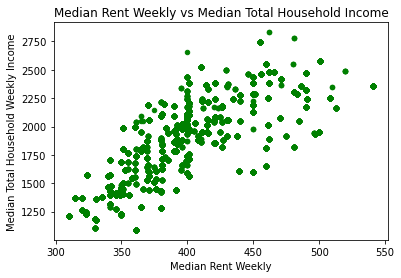

In [46]:
df_filtered[['Median Rent Weekly', 'Median Total Household Weekly Income']].plot.scatter(x='Median Rent Weekly', y='Median Total Household Weekly Income', c="g")
plt.title("Median Rent Weekly vs Median Total Household Income")
plt.savefig('../plots/correlation_scatterplot_2.png', bbox_inches='tight')
plt.show()



Standardise Features then apply Principal Component Analysis
(based on https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

In [48]:
features = ['# Beds', '# Bathrooms', '# Parking Spaces', 'longitude', 
            'latitude', 'Median Total Personal Weekly Income', 'Median Rent Weekly', 'Median Total Family Weekly Income', 
              'Median Total Household Weekly Income', 'Total Population', 'Total Offence Count']

# Separating out the features
x = property_df.loc[:, features].values

# Separating out the target
y = property_df.loc[:,['Rent Price']].values

# Standardizing the features
x_standardised = StandardScaler().fit_transform(x)

**Projecting these features into a 2d representation of the data**

This is in order to visualise the two main dimensions of variation


In [49]:
#we want to reduce the data to two components, keeping the top two principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_standardised)

principal_df = pd.DataFrame(data = principal_components
             ,columns = ['principal component 1', 'principal component 2'])

In [50]:
principal_df

,principal component 1,principal component 2
0,-3.251333,4.043425
1,-0.491373,1.317637
2,-0.532060,2.440605
3,-0.867087,3.238996
4,-0.156607,2.038664
...,...,...
10859,1.714150,0.778708
10860,1.735434,0.181194
10861,1.560575,3.308584
10862,1.736905,0.277028


In [51]:
final_reduced_df = pd.concat([principal_df, property_df[['Rent Price']]], axis = 1)


In [52]:
final_reduced_df

,principal component 1,principal component 2,Rent Price
0,-3.251333,4.043425,875.000000
1,-0.491373,1.317637,850.000000
2,-0.532060,2.440605,830.000000
3,-0.867087,3.238996,795.000000
4,-0.156607,2.038664,793.269231
...,...,...,...
10859,1.714150,0.778708,365.000000
10860,1.735434,0.181194,300.000000
10861,1.560575,3.308584,480.000000
10862,1.736905,0.277028,285.000000


**Visualise the 2D Projection**

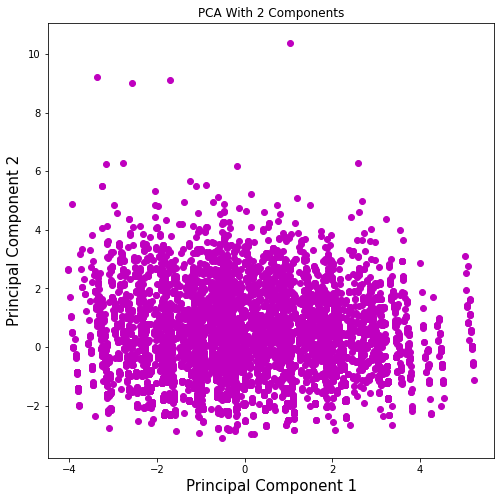

In [56]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA with 2 Components', fontsize = 20)

ax.scatter(final_reduced_df['principal component 1']
               ,final_reduced_df['principal component 2'], c='m')

plt.title("PCA With 2 Components")
plt.savefig('../plots/PCA_visualisation.png', bbox_inches='tight')
plt.show()


In [58]:
#see the variance explained by each component 

print("Variance explained by Principal Component 1: ", (pca.explained_variance_ratio_ * 100)[0]) 
print("Variance explained by Principal Component 2: ", (pca.explained_variance_ratio_ * 100)[1]) 

print("Variance explained by the two Principal Components: ", np.cumsum(pca.explained_variance_ratio_ * 100)[1]) 




Variance explained by Principal Component 1:  30.99860773409383
Variance explained by Principal Component 2:  18.566218110689274
Variance explained by the two Principal Components:  49.5648258447831
